In [ ]:
from Binaries import *

Hardware = HardwareClassifier()

vem_peak_scaled = np.array([180.23, 182.52, 169.56]) / 1.115                         # 11.5% surplus

In [ ]:
DownsamplingTest = EventGenerator(["19_19.5"], vem_peak = vem_peak_scaled, keep_scale = True, force_inject = 0, sigma = 0, apply_downsampling = True, split = 1)

In [ ]:
shit_traces = []

for i in range(DownsamplingTest.__len__()):

    traces, _ = DownsamplingTest.__getitem__(i, full_trace = True)
    print(f"Enumerating over showers... {i + 1}/{DownsamplingTest.__len__()}", end = " -- LAST: \r")

    for trace in traces:

        if not trace.SPDistance < 1000 or not trace.Zenith < 26:  
            print("rejected -- SP Distance / Zenith         ", end = "\r")
            continue

        for index in DownsamplingTest.__sliding_window__(trace):

            trace_section, _____, ________, ________ = trace.get_trace_window((index, index + 120), True, True)
            #              label, integral, metadata

            if Hardware(trace_section): 
                print("recjected -- triggered                    ", end = "\r")
                break

        else:
            print("accepted -- No trigger!!!")

            trace.__plot__()
            shit_traces.append(trace)

In [7]:
from Binaries import *

FN_predictions = np.loadtxt("/cr/data01/filip/models/HardwareClassifier/ROC_curve/random_traces_downsampled_vem_peak_scaled/false_negatives.csv")

print(len(FN_predictions))

# vvv dataset entry
# 0.013 2 5.849e+18 3591 38.546


520780


31998


(-0.1, 0.7)

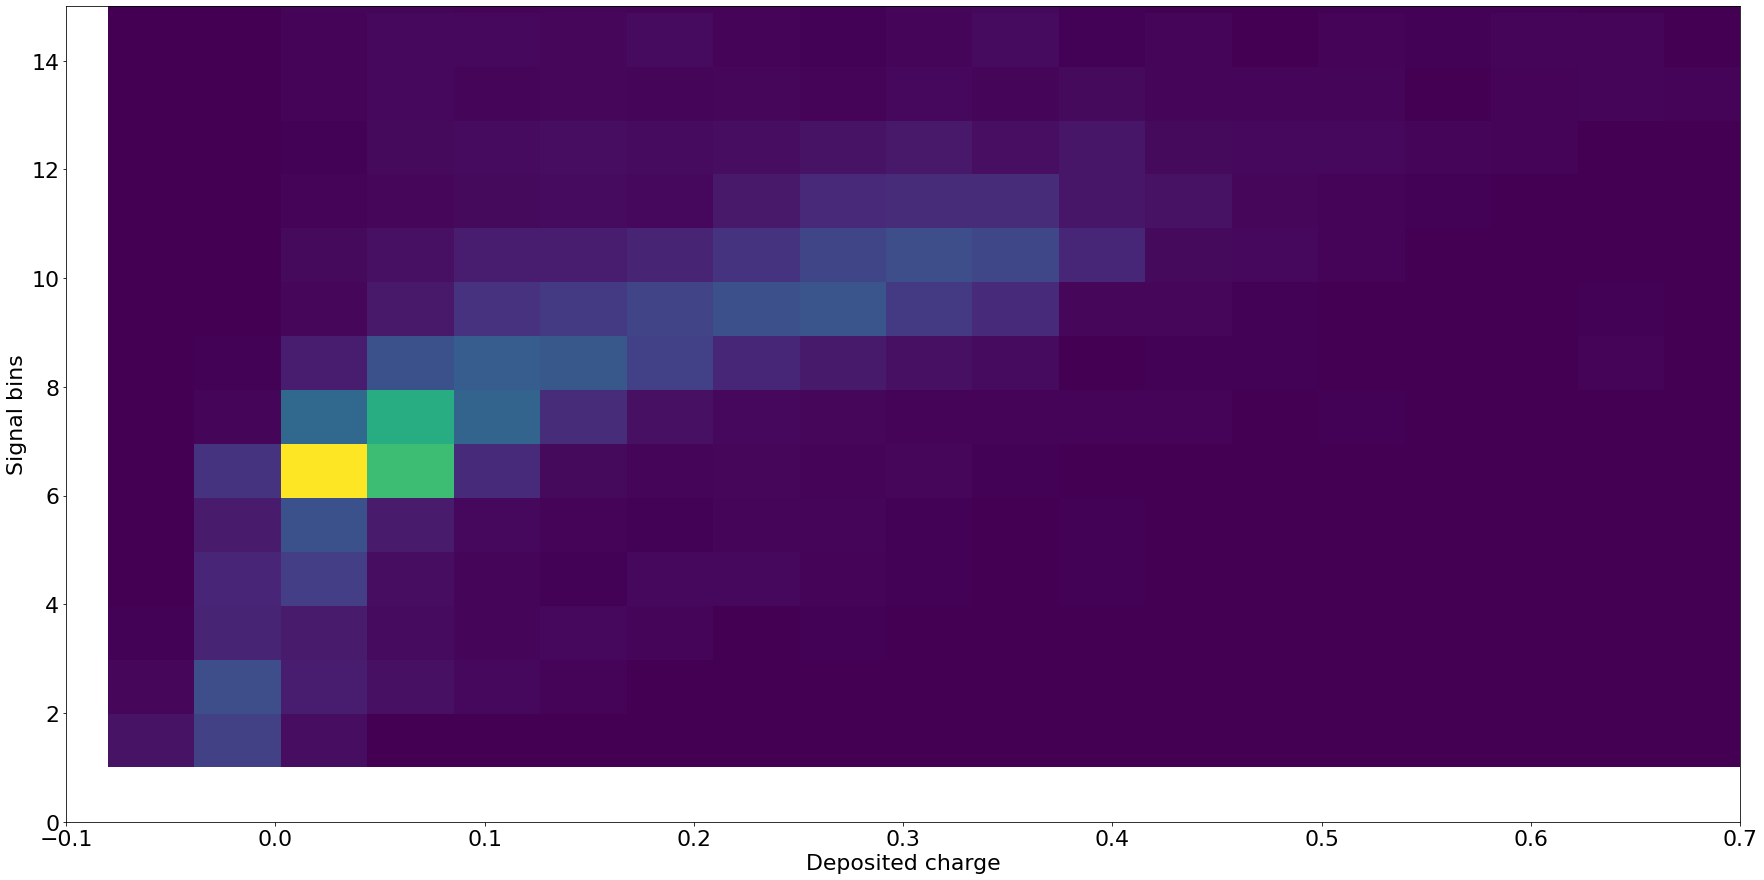

In [10]:
zenith = FN_predictions[:, -1] < 26
energy_low = 10**19 <= FN_predictions[:, 2]
energy_high = FN_predictions[:, 2] < 10**19.5
energy = [E_low and E_high for E_low, E_high in zip(energy_low, energy_high)]
filter = [Zenith and Energy for Zenith, Energy in zip (zenith, energy)]

print(len(FN_predictions[filter]))

plt.hist2d(FN_predictions[filter, 0], FN_predictions[filter, 1], bins = (100, 120))
plt.ylabel("Signal bins")
plt.xlabel("Deposited charge")

plt.ylim(0, 15)
plt.xlim(-0.1, 0.7)